In [1]:
from skyfield.api import load
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# === Настройки даты ===
year, month, day = 1996, 7, 21

# Загружаем эфемериды JPL
planets = load('Data/de440s.bsp')

# Список планет
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
planet_keys = ['mercury', 'venus', 'earth', 'mars', 'jupiter barycenter', 'saturn barycenter', 'uranus barycenter', 'neptune barycenter']


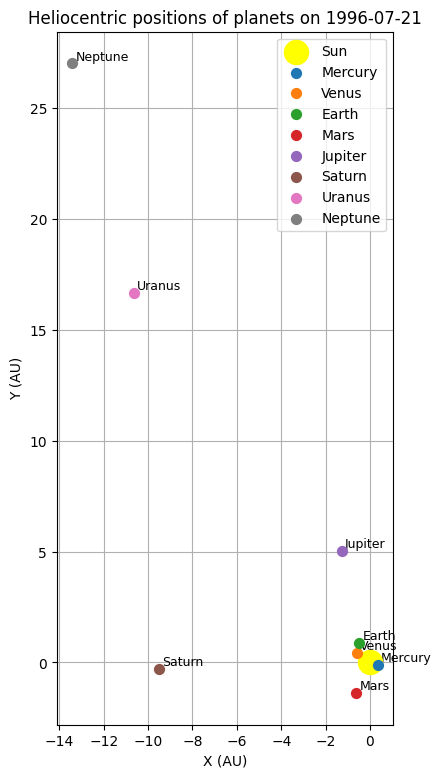

In [5]:
# Обновлённый список ключей — barycenter для Земли и Марса, как и для остальных планет-гигантов
planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
planet_keys = [
    'mercury',
    'venus',
    'earth barycenter',
    'mars barycenter',
    'jupiter barycenter',
    'saturn barycenter',
    'uranus barycenter',
    'neptune barycenter'
]

ts = load.timescale()
t = ts.utc(year, month, day)

fig, ax = plt.subplots(figsize=(9, 9))

# Рисуем орбиты
for key, name in zip(planet_keys, planet_names):
    planet = planets[key]
    orbit_x, orbit_y = [], []
    for deg in np.linspace(0, 360, 200):
        t_orbit = ts.utc(year, month, day) + (deg / 360.0)  # сдвиг по времени (часть года)
        pos = planet.at(t_orbit).observe(planets['sun']).ecliptic_position()
        orbit_x.append(pos.au[0])
        orbit_y.append(pos.au[1])
    ax.plot(orbit_x, orbit_y, color='gray', linewidth=0.8, alpha=0.5)

# Рисуем позиции планет на дату
x_vals, y_vals = [], []
for key in planet_keys:
    planet = planets[key]
    pos = planet.at(t).observe(planets['sun']).ecliptic_position()
    x_vals.append(pos.au[0])
    y_vals.append(pos.au[1])

# Солнце
ax.scatter(0, 0, color='yellow', s=300, label='Sun', zorder=5)

# Планеты
for i, name in enumerate(planet_names):
    ax.scatter(x_vals[i], y_vals[i], label=name, s=50, zorder=5)
    ax.text(x_vals[i] + 0.15, y_vals[i] + 0.15, name, fontsize=9)

ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_title(f'Heliocentric positions of planets on {year}-{month:02d}-{day:02d}')
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.legend()
plt.show()


mercury: x: 0.3400389855860493, y: -0.11751170903427194
venus: x: -0.5874073835401675, y: 0.42842005247873566
earth barycenter: x: -0.4858734853775145, y: 0.8923922500338469
mars barycenter: x: -0.6119198011800968, y: -1.3810008249720314
jupiter barycenter: x: -1.273223650190708, y: 5.038601739735691
saturn barycenter: x: -9.50674749182411, y: -0.28615359115902067
uranus barycenter: x: -10.654129565920286, y: 16.658265375415723
neptune barycenter: x: -13.419773994307628, y: 27.00923136280883


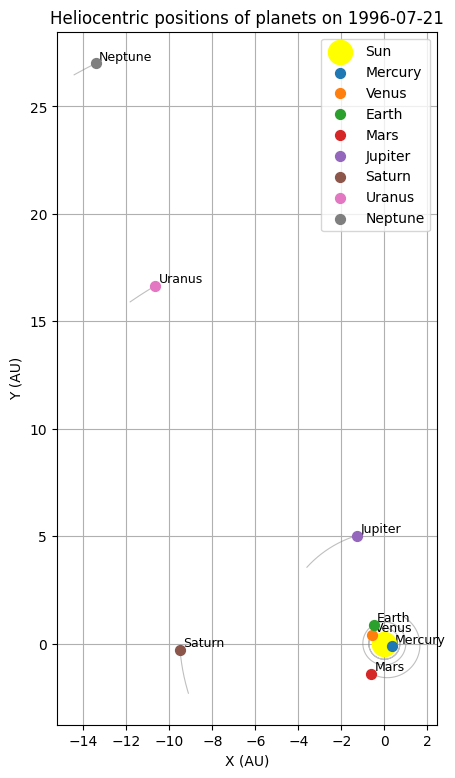

In [13]:


planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
planet_keys = [
    'mercury',
    'venus',
    'earth barycenter',
    'mars barycenter',
    'jupiter barycenter',
    'saturn barycenter',
    'uranus barycenter',
    'neptune barycenter'
]

ts = load.timescale()
t = ts.utc(year, month, day)
# fig, ax = plt.subplots(figsize=(16.5, 11.7), dpi=300)

fig, ax = plt.subplots(figsize=(9, 9))

scale = 1

# Рисуем орбиты
for key, name in zip(planet_keys, planet_names):
    planet = planets[key]
    orbit_x, orbit_y = [], []
    for deg in np.linspace(0, 360, 200):
        # Сдвигаем дату в пределах одного года (365.25 дней)
        delta_days = deg / 360.0 * 365.25
        t_orbit = ts.utc(year, month, day) + delta_days
        pos = planet.at(t_orbit).observe(planets['sun']).ecliptic_position()
        orbit_x.append(pos.au[0] * scale)
        orbit_y.append(pos.au[1] * scale)
    ax.plot(orbit_x, orbit_y, color='gray', linewidth=0.8, alpha=0.5)

# Рисуем позиции планет на дату
x_vals, y_vals = [], []
for key in planet_keys:
    planet = planets[key]
    pos = planet.at(t).observe(planets['sun']).ecliptic_position()
    print(f'{key}: x: {pos.au[0]}, y: {pos.au[1]}')
    x_vals.append(pos.au[0] * scale)
    y_vals.append(pos.au[1] * scale)

# Солнце
ax.scatter(0, 0, color='yellow', s=300, label='Sun', zorder=5)

# Планеты
for i, name in enumerate(planet_names):
    ax.scatter(x_vals[i], y_vals[i], label=name, s=50, zorder=5)
    ax.text(x_vals[i] + 0.15, y_vals[i] + 0.15, name, fontsize=9)

ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_title(f'Heliocentric positions of planets on {year}-{month:02d}-{day:02d}')
ax.set_aspect('equal', 'box')
ax.grid(True)
ax.legend()

# plt.savefig('planets_a3.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
from skyfield.api import load
import csv

# Дата для расчёта
year, month, day = 1996, 7, 21

# Масштаб (1 а.е. -> scale пикселей)
scale = 500

# Центр холста в пикселях (например, для 1920x1080)
center_x = 960
center_y = 540

# Загрузка эфемерид
planets = load('Data/de440s.bsp')

ts = load.timescale()
t = ts.utc(year, month, day)

planet_names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
planet_keys = [
    'mercury',
    'venus',
    'earth barycenter',
    'mars barycenter',
    'jupiter barycenter',
    'saturn barycenter',
    'uranus barycenter',
    'neptune barycenter'
]

sun = planets['sun']

data = []

for name, key in zip(planet_names,planet_keys):
    planet = planets[key]
    pos = planet.at(t).observe(sun).ecliptic_position().au
    x_au, y_au = pos[0], pos[1]
    # Инвертируем координаты, чтобы Солнце было в центре (0,0)
    x_au, y_au = -x_au, -y_au
    # Масштабируем и сдвигаем в центр холста
    x_px = center_x + x_au * scale
    y_px = center_y - y_au * scale  # минус, т.к. в Figma Y вниз
    data.append((name, x_px, y_px))

# Добавляем сам Солнце в центр
data.append(('Sun', center_x, center_y))

with open('planets_figma.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Planet', 'X_px', 'Y_px'])
    writer.writerows(data)

print("Координаты с центром сохранены в 'planets_figma.csv'")
